### Chapter 5.3 
# Analysis of Finite M/G/1-S Waiting Queue using Power Method

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---


A finite capacity queue is analyzed. Arrivals follow a Poisson process with rate $\lambda$, i.e. $A \sim Exp(\lambda)$. The service times follow a general continuous distribution $B$ with cumulative distribution function $B(t)$ and probability density function $b(t)$. The system has one service unit. The waiting room is limited and there are $S$ waiting places in total. Hence, the total system capacity is $S+1$ and finite.

For the analysis of the steady state distributions, the method of embedded Markov chain is used. The Markov chain is embedded immediately after the departure of a customer. The state probabilities at the embedding times are derived with the power method by iteratively computing the state probabilities $X_n$ at the $n$-th embedding time instant and using the transition probability matrix $\mathcal{P}$. The vector $X_n = \left(x_n(0), x_n(1), \dots, x_n(S)\right)$ represents the state probabilities at the $n$-th embedding time instant. The system is initialized with a start condition $X_0$, e.g., the empty system is $X_0 = (1, 0, \dots, 0)$. Then, the iteration is compactly denoted as $X_{n+1} = X_n \cdot \mathcal{P}$. The power method iterates as long as a stop condition is not fulfilled, $f(X_n, X{n+1})<\epsilon$. A simple, but in practice often sufficiently accurate stop condition is the difference of the means, $f(X_n, X_{n+1}) = \left|E[X_{n}]-E[X_{n+1}]\right|<\epsilon$.

## Transition probability matrix $\mathcal{P}$
The transition probability matrix $\mathcal{P}$ is the key for the analysis using the power method. The finite transition matrix contains the elements $p_{i,j}$ with $i,j = 0,1, \dots S$. Thereby, $p_{ij}$ denotes the transition probabilities for this Markov chain at the embedded time instants. 

$
p_{ij}=P(X_{n+1}=j|X_n=i)
$

The transition probabilities depend on the distribution $\Gamma$ of the number of jobs arriving durch a service time of length $B$. The $p_{ij}$ will be derived in the next paragraph.
It is worth to mention that the maximum number of jobs in the system is $S$ (and not $S+1$), since the embedding time instants are immediately after a departure of a job.

$
\mathcal{P} = \{ p_{ij} \} = \left(\begin{array}{lllll} 
\gamma(0) & \gamma(1) & \gamma(2) & \cdots & 1-\sum_{i=0}^{S-1} \gamma(i)  \\ 
\gamma(0) & \gamma(1) & \gamma(2) & \cdots & 1-\sum_{i=0}^{S-1} \gamma(i)  \\ 
0 & \gamma(0) & \gamma(1)  & \cdots & 1-\sum_{i=0}^{S-2} \gamma(i)  \\ 
0 & 0 & \gamma(0) &  \cdots & 1-\sum_{i=0}^{S-3} \gamma(i)  \\ 
\vdots & \vdots & \vdots & & \vdots \\ 
0 & 0 & \cdots & \gamma(0) & 1-\gamma(0)  \\ 
\end{array}\right)
$

### Number of arrivals during service time
The random variable $\Gamma$ reflects the number of arrivals during a single service time $B$. The probability is $\gamma(i)=P(\Gamma=i)$ for $i=0,1,\dots$ with the PDF $b(t)$ of the service time.

$
\gamma(i) = \int_0^\infty \frac{e^{-\lambda t}(\lambda t)^i}{i!}b(t) dt
$

We derive the probability $\gamma(i)$ numerically using `scipy.integrate`. The PDF of the service time $b(t)=\mu e^{-\mu t}$ (for which we know exact analytical solutions).

In [16]:
import numpy as np
from scipy.integrate import quad
from scipy.special import factorial

# parameters of the system
S = 10    # number of waiting places
lam = 1.7 # arrival rate
mu = 1.3

# PDF b(t) of the service time
def pdf_b(t, mu=mu):
    return mu*np.exp(-mu*t) # B ~ Exp(mu)

# gamma_i = P(i arrivals during a service time B)
def integrand(t, i, lam=lam):
    return np.exp(-lam*t)*(lam*t)**i/factorial(i)*pdf_b(t)

# numerical derivation of the integral 
gamma_i = np.zeros(S+1)
for i in np.arange(S+1):
    gamma_i[i] = quad(integrand, 0, np.inf, args=(i, lam))[0]

#gamma_i[S] = 1-gamma_i[:-1].sum()
print(f'gamma(i)={gamma_i}')

gamma(i)=[0.43333333 0.24555556 0.13914815 0.07885062 0.04468202 0.02531981
 0.01434789 0.00813047 0.00460727 0.00261078 0.00147944]


### Definition of the transition matrix
Now, the transition probability matrix $\mathcal{P}$ can be instantiated. It happens easily that errors are introduced when defining the matrix. Therefore, it is strongly recommended to double check the correct definition and calculation of the elements of the matrix. The matrix is printed and visualized.

          0         1         2         3         4         5         6   \
0   0.433333  0.245556  0.139148  0.078851  0.044682  0.025320  0.014348   
1   0.433333  0.245556  0.139148  0.078851  0.044682  0.025320  0.014348   
2   0.000000  0.433333  0.245556  0.139148  0.078851  0.044682  0.025320   
3   0.000000  0.000000  0.433333  0.245556  0.139148  0.078851  0.044682   
4   0.000000  0.000000  0.000000  0.433333  0.245556  0.139148  0.078851   
5   0.000000  0.000000  0.000000  0.000000  0.433333  0.245556  0.139148   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.433333  0.245556   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.433333   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9         10  
0   0.008130  0.004607  0.002611  0.003414

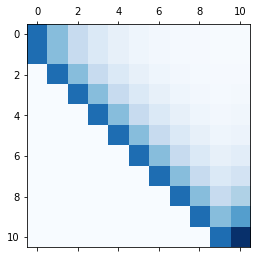

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

P = np.zeros((S+1,S+1), dtype='float64')
for row in np.arange(len(P)):
    for col in np.arange(max(0,row-1), len(P)):
        if col==S:
            P[row,col] = 1-np.sum(P[row,:col])            
        else:
            if row==0:
                P[0,col] = gamma_i[col]
            else:
                P[row,col] = gamma_i[col-row+1]

                # Print and visualize the transition matrix P
print(pd.DataFrame(P)) # pretty display of the matrix using Pandas
plt.figure(1)
plt.clf()
plt.matshow(P,fignum=1, cmap='Blues');

## Implementation of the Power Method
The system is initialized with an empty system through proper definition of $X_0$. 
Then, the iteration is continued until a certail stop condition is fulfilled. A typical example is the difference of means: $\left|E[X_{n+1}] - E[X_{n}] \, \right| < \epsilon$.

The implemenation of the power method is straightforward. It requires the start condition $X_0$ and the transition matrix $\mathcal{P}$ as well as a stopping condition.

In [18]:
#%% Definition of stop function
def stopFunction_mean(X1, X_old, epsilon=1e-6):
    EX_old = X_old @ np.arange(S+1)  # first moment
    EX1 = X1 @ np.arange(S+1)
    return abs(EX_old-EX1) > epsilon 

def powerMethod(X0, P, stopFunction):
    X_old = np.zeros(S+1)
    X1 = X0
    epsilon = 1e-3
    num = 0
    while stopFunction(X1, X_old, epsilon) or num<5: # at least 5 iterations
        X_old = X1
        X1 = X_old @ P # matrix mulitplication        
        num +=1
    return X1, num

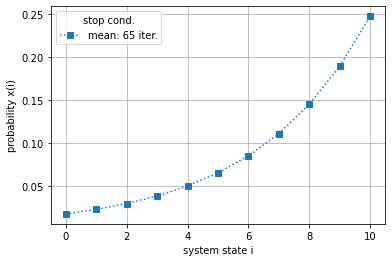

In [19]:
# start condition: empty system
X0 = np.zeros(len(P)) 
X0[0] = 1 # empty system

# call the power method
X, num =  powerMethod(X0, P, stopFunction_mean)

# plot the steady state distribution
plt.plot(X,'s:', label=f'mean: {num} iter.')
plt.xlabel('system state i')
plt.ylabel('probability x(i)')
plt.legend(title='stop cond.')
plt.grid(which='major')

## Computing the system state distribution as Eigenvector of the transition probability matrix
Python also offers numerical methods to compute the Eigenvector. In the steady state, the probability distribution of the system state $X$ is the Eigenvector of the transition probability matrix $\mathcal{P}$ with respect to the Eigenvalue 1. 

$ X = X \cdot \mathcal{P}$

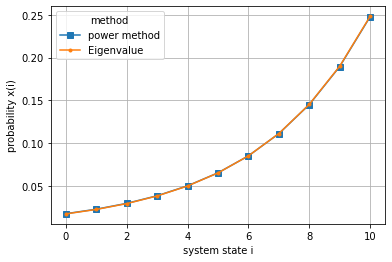

In [61]:
import scipy.sparse.linalg as sla

eigenvalue, evec = sla.eigs(P.T, k=1, which='LM')
X_eigen =  (evec/evec.sum()).real


plt.plot(X,'s-', label='power method');
plt.plot(X_eigen,'.-', label='Eigenvalue');
plt.xlabel('system state i')
plt.ylabel('probability x(i)')

plt.legend(title='method')
plt.grid(which='major');

## State distribution at arbitrary time instants

The embedding time instants are immediately after departure of customers. The derivation of the steady state distribution at arbitrary time instants is described in Shortle et al. (2018).

$x^*(i) = \frac{x(i)}{x(0)+\rho} \text{ with } \rho={\lambda}E[B]$

Shortle, John F.; Thompson, James M.; Gross, Donald; Harris, Carl M.. Fundamentals of Queueing Theory (Wiley Series in Probability and Statistics). Wiley. (2018)

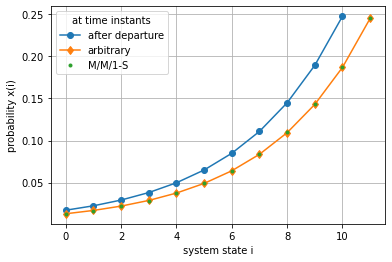

In [62]:
EB = quad(lambda t: t*pdf_b(t), 0, np.inf)[0] # E[B]=1/mu
rho = lam*EB
X_star = X/(X[0]+rho)
X_star = np.append(X_star, 1-X_star.sum())

plt.plot(X,'o-', label='after departure');
plt.plot(X_star,'d-', label='arbitrary');

# Analytical solution for M/M/1-S
prob = np.zeros(S+2)
a = lam/mu
i = np.arange(1,S+2)
prob[0] = 1/(1+ np.sum(a**i))
prob[i] = a**i * prob[0]

plt.plot(prob,'.', label='M/M/1-S')

plt.xlabel('system state i')
plt.ylabel('probability x(i)')
plt.legend(title='at time instants')
plt.grid(which='major')